# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from typing import List, Tuple
from source.utils import save_data, load_data, split_data

# Get Data

In [2]:
df = pd.read_csv(
    '../data/raw/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
    parse_dates=['Date'],
    index_col=['Date']
)

# EDA

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


Because we told pandas to parse the date column and set it as the index, its not in the list of columns.

In [5]:
len(df)

2787

We've collected the historical price of Bitcoin for ~8 years but there's only 2787 total samples.

🔑 **Note**: The frequency at which a time series value is collected is often referred to as seasonality. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a seasonality of 365. Time series data collected with different seasonality values often exhibit seasonal patterns.

Let's remove some of the columns from our data so we're only left with a date index and the closing price.

In [6]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(
    columns = {'Closing Price (USD)':'Price'}
)

In [7]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


But that's only five days worth of Bitcoin prices, let's plot everything we've got.

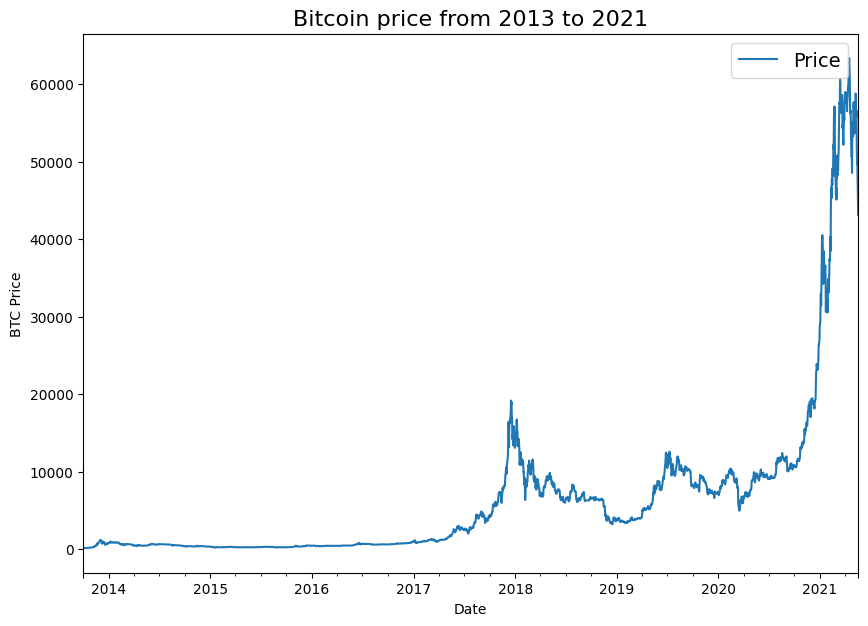

In [8]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title("Bitcoin price from 2013 to 2021", fontsize=16)
plt.legend(fontsize=14);

# Format Data

## Creating train and test sets

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [10]:
X_train, X_test, y_train, y_test = split_data(
    timesteps=timesteps,
    prices=prices
)

In [11]:
X_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

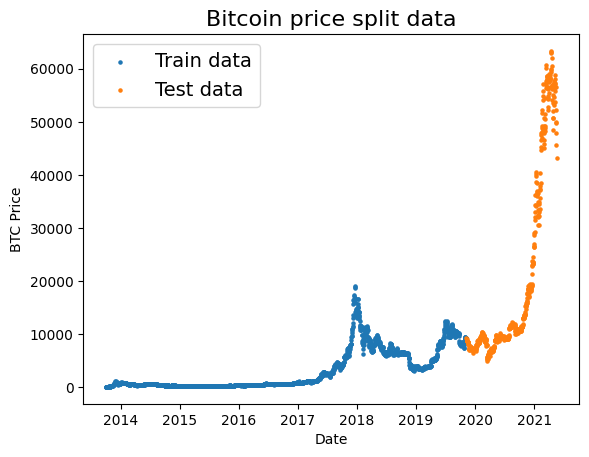

In [17]:
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title("Bitcoin price split data", fontsize=16)
plt.legend(fontsize=14)
plt.show();

We're going to be using the training set (past) to train a model to try and predict values on the test set (future). Because the test set is an artificial future, we can guage how our model might perform on actual future data.

In [13]:
save_data(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    save_dir='../data/features'
)